## Activation functions

In [23]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np

In [24]:
PLOTS = "plots"

def save_fig(filename, folder=PLOTS):
    plt.savefig(os.path.join(folder, filename))

In [25]:
# Define the input range for the activation functions
x = torch.linspace(-3, 3, 100, requires_grad=True)

# Create a list of the desired activation functions
activations_list = ['PReLU', 'Tanh', 'GLU', 'Softplus']

# Initialize the activation functions
prelu = torch.nn.PReLU(num_parameters=1, init=0.25)
tanh = torch.nn.Tanh()
softplus = torch.nn.Softplus()

# GLU activation requires 2n input for n output
glu_input = torch.cat((x, x), 0).reshape(2, -1)

# Compute outputs
prelu_output = prelu(x)
tanh_output = tanh(x)
glu_output = torch.nn.functional.glu(glu_input, dim=0)
softplus_output = softplus(x)

# Compute derivatives
prelu_deriv = torch.autograd.grad(outputs=prelu_output.sum(), inputs=x, retain_graph=True)[0]
tanh_deriv = torch.autograd.grad(outputs=tanh_output.sum(), inputs=x, retain_graph=True)[0]
glu_deriv = torch.autograd.grad(outputs=glu_output.sum(), inputs=glu_input, retain_graph=True)[0]
softplus_deriv = torch.autograd.grad(outputs=softplus_output.sum(), inputs=x, retain_graph=True)[0]

outputs = [prelu_output, tanh_output, glu_output, softplus_output]
derivs = [prelu_deriv, tanh_deriv, glu_deriv.mean(dim=0), softplus_deriv]  # glu_deriv is averaged over 2n inputs

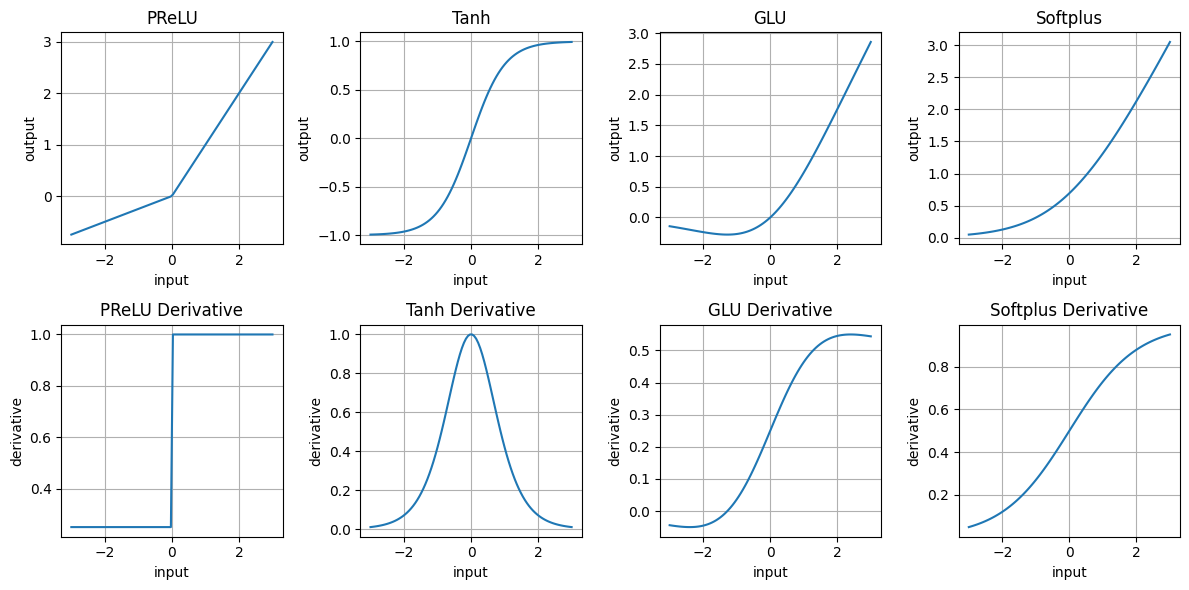

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
for i, activation in enumerate(activations_list):
    ax[0, i].plot(x.detach().numpy(), outputs[i].detach().numpy().flatten())
    ax[0, i].set_title(activation)
    ax[0, i].grid(True)
    ax[0, i].set_xlabel('input')
    ax[0, i].set_ylabel('output')

    ax[1, i].plot(x.detach().numpy(), derivs[i].detach().numpy().flatten())
    ax[1, i].set_title(activation + ' Derivative')
    ax[1, i].grid(True)
    ax[1, i].set_xlabel('input')
    ax[1, i].set_ylabel('derivative')

plt.tight_layout()
plt.show()